<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/IQR(HANDLING_OUTLIER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the IQR (Interquartile Range) method is a simple approach to detect and remove outliers.
unlike z-score technique , this technique is used on skewed data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/placement (2).csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: >

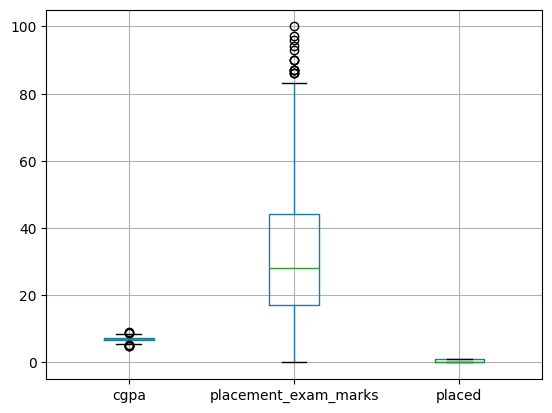

In [ ]:
df.boxplot()

<ipython-input-40-de614b1f4e84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-40-de614b1f4e84>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


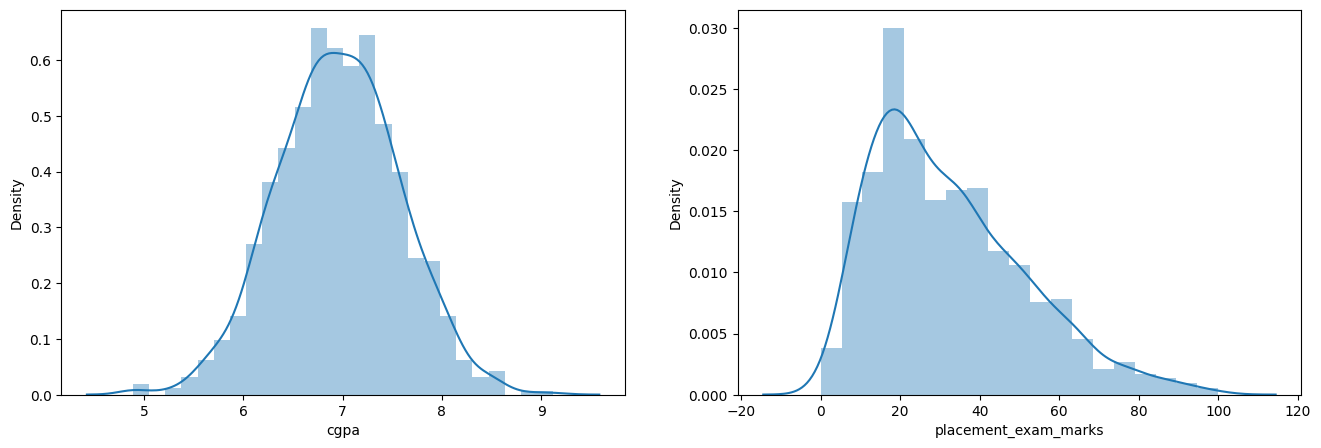

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [ ]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [ ]:
placement25=df['placement_exam_marks'].quantile(0.25)
placement75=df['placement_exam_marks'].quantile(0.75)

In [ ]:
placement25,placement75

(17.0, 44.0)

In [ ]:
iqr=placement75-placement25
iqr

27.0

In [ ]:
minimum=placement25-(1.5*iqr)
maximum=placement75+(1.5*iqr)

In [ ]:
minimum , maximum

(-23.5, 84.5)

In [ ]:
df[df['placement_exam_marks'] > maximum]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [ ]:
df[df['placement_exam_marks'] < minimum]

,cgpa,placement_exam_marks,placed


# **TRIMMING**

In [ ]:
new_df=df[(df['placement_exam_marks'] > minimum) & (df['placement_exam_marks'] < maximum)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: >

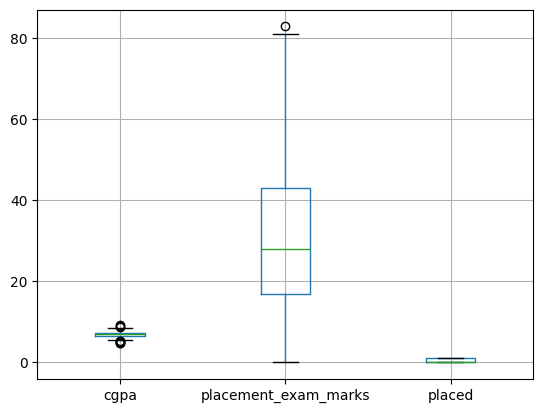

In [ ]:
 new_df.boxplot()

<ipython-input-29-5fdbb5671b36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-29-5fdbb5671b36>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


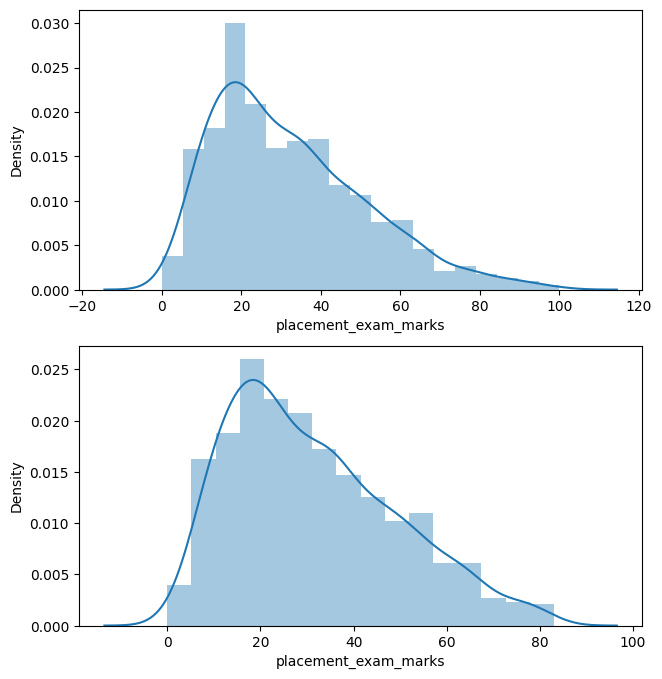

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])



plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])



plt.show()

# **CAPPING**

In [ ]:
capped_df=df.copy()


In [ ]:
capped_df['placement_exam_marks']=np.where(
    capped_df['placement_exam_marks']>maximum,
    maximum,
    np.where(
        capped_df['placement_exam_marks']<minimum,
        minimum,
        capped_df['placement_exam_marks']
    )
)

<ipython-input-39-d2efb6ea82f0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-39-d2efb6ea82f0>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(capped_df['placement_exam_marks'])


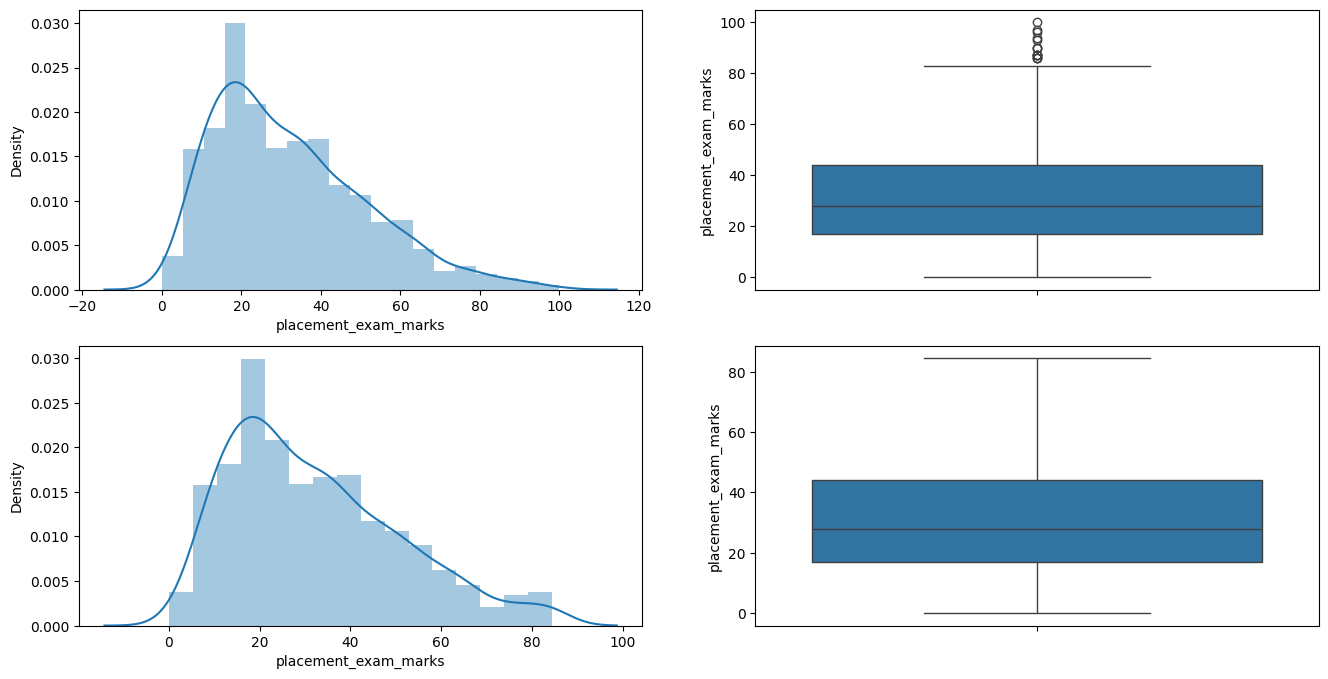

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(capped_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(capped_df['placement_exam_marks'])

plt.show()